## Feature Selection - Filter Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

### 1. Columnas constantes

Aquellas que tienen un solo valor en todas las filas (no aportan información)

**Umbral de Varianza**

El umbral de varianza de sklearn es un enfoque  simple para la selección de características. Elimina todas las variables cuya varianza no alcanza algún umbral. De forma predeterminada, elimina todas las características de varianza cero, es decir, que tienen el mismo valor en todas las filas.

In [ ]:
X_train = pd.read_csv('train.csv', nrows=35000)
X_test = pd.read_csv('test.csv', nrows=15000)

In [14]:
X_train.drop(labels=['TARGET'], axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

#### 1.1. Variables Constantes

Las características constantes son aquellas que muestran el mismo valor, solo un valor, para todas las observaciones del conjunto de datos. Es decir, el mismo valor para todas las filas del conjunto de datos. Estas características no proporcionan información que permita a un modelo discriminar o predecir un objetivo.

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0)
sel.fit(X_train) # fit finds the features with zero variance

VarianceThreshold(threshold=0)

`get_support` es un vector booleano que indica qué características se conservan. Si sumamos `get_support`, obtenemos la cantidad de variables que no son constantes

In [16]:
sum(sel.get_support())

319

Podemos ver que hay 51 columnas/variables que son constantes. Esto significa que 51 variables muestran el mismo valor, solo un valor, para todas las observaciones del conjunto de entrenamiento.

In [17]:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

Usamos la función de transformación para reducir los conjuntos de entrenamiento y prueba. Esto elimina las columnas constantes

In [18]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [19]:
X_train.shape, X_test.shape

((35000, 319), (15000, 319))

#### 1.2. Variables cuasi constantes

Las características con varianza cercana a cero se denominan cuasi constantes. Muestran el mismo valor para la gran mayoría de las observaciones del conjunto de datos. En general, estas características proporcionan poca o ninguna información que permita a un modelo discriminar o predecir un objetivo. Pero puede haber excepciones. Por eso debemos tener cuidado al eliminar este tipo de variables.

In [20]:
X_train = pd.read_csv('train.csv', nrows=35000)
X_test = pd.read_csv('test.csv', nrows=15000)

In [21]:
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [22]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [23]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [24]:
sum(sel.get_support())

263

Podemos ver que 107 columnas/variables son casi constantes. Esto significa que 107 variables muestran predominantemente un valor para ~99% de las observaciones del conjunto de entrenamiento.

In [25]:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

Por ejemplo, para `ind_var31` podemos ver que > 99% de las observaciones muestran un valor de 0. Por lo tanto, esta característica es casi constante.

In [26]:
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.996286
1    0.003714
Name: ind_var31, dtype: float64

In [27]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [28]:
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

### 2. Metodos de Selección univariada

- Los métodos de selección de características univariadas funcionan seleccionando las mejores características basándose en pruebas estadísticas univariadas como
ANOVA. Scikit-learn expone rutinas de selección de características como objetos que implementan el método de transformación.

- Los métodos basados en la prueba F estiman el grado de dependencia lineal entre dos variables aleatorias. Suponen una relación lineal entre la característica y el objetivo. Estos métodos también suponen que las variables siguen una distribución gaussiana.

- Hay 4 métodos que entran en esta categoría:

    - `SelectKBest`
    - `SelectPercentil`

- Estos objetos toman como entrada una función de puntuación que devuelve puntuaciones univariadas y valores p (o sólo puntuaciones para `SelectKBest` y `SelectPercentile`):

    - Para regresión: `r_regression`, `f_regression`,`mutual_info_regression`
    - Para clasificación: `chi2`, `f_classif`,`mutual_info_classif`


Los métodos basados en la prueba F estiman el grado de dependencia lineal entre dos variables aleatorias. Por otro lado, los métodos de información mutua pueden capturar cualquier tipo de dependencia estadística, pero al no ser paramétricos, requieren más muestras para una estimación precisa.

#### 2.1. SelectKBest

- Este método selecciona características de acuerdo con las k puntuaciones más altas.
- Realizaremos una prueba de chi-cuadrado en las muestras para recuperar solo las dos mejores características del conjunto de datos del iris

In [29]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

Seleccionamos las 2 mejores caracteristicas

In [30]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

#### 2.2. SelectPercentile

Elimina todas las funciones excepto el porcentaje de puntuación más alto especificado

In [31]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

Seleccionamos características basadas en el percentil 10 superior

In [32]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

### 3. Mutual Information

La ganancia de información o información mutua mide cuánta información contribuye la presencia/ausencia de una característica para realizar la predicción correcta sobre el objetivo. Describe las relaciones en términos de incertidumbre. La información mutua (IM) entre dos cantidades es una medida de hasta qué punto el conocimiento de una cantidad reduce la incertidumbre sobre la otra. Si supiera el valor de una característica, ¿cuánta más confianza tendría en el target?

Mostraremos un ejemplo de los datos de Ames Housing. La figura muestra la relación entre la calidad exterior de una casa y el precio por el que se vendió. Cada punto representa una casa.

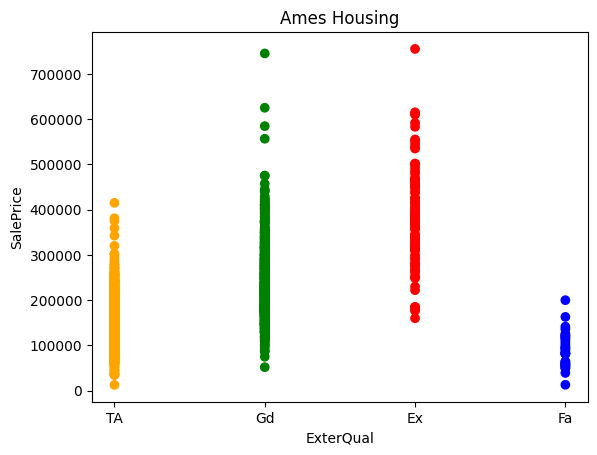

In [42]:
ames = pd.read_csv('AmesHousing.csv')

color = {'Fa': 'blue',
         'TA': 'orange',
         'Gd': 'green',
         'Ex': 'red'}

category_colors = ames['Exter Qual'].map(color)

plt.scatter(ames["Exter Qual"], ames["SalePrice"], c=category_colors)
plt.xlabel("ExterQual")
plt.ylabel("SalePrice")
plt.title("Ames Housing")
plt.show()

En la figura, podemos ver que conocer el valor de `ExterQual` debería darnos más seguridad sobre el `SalePrice` correspondiente: cada categoría de `ExterQual` tiende a concentrar `SalePrice` dentro de un rango determinado. La información mutua que `ExterQual` tiene con `SalePrice` es la reducción promedio de la incertidumbre en `SalePrice` tomada sobre los cuatro valores de `ExterQual`. Dado que `Fa` ocurre con menos frecuencia que `TA`, por ejemplo, `Fa` obtiene menos peso en la puntuación MI.

*(Nota: Lo que llamamos incertidumbre se mide usando una cantidad de la teoría de la información conocida como "entropía". La entropía de una variable significa aproximadamente: "cuántas preguntas de sí o no necesitarías para describir una ocurrencia de esa variable, en promedio". Cuantas más preguntas tenga que hacer, más inseguro debe estar acerca de la variable. La información mutua es cuántas preguntas espera que responda la variable sobre el target).*

##### Interpretación del MI score

El score mínimo posible entre dos variables es 0. Cuando ocurre esto, se dice que hay independencia: ninguna variable puede decir nada sobre la otra. Por el contrario, en teoría no existe un límite superior para el valor del score. Sin embargo, en la práctica, los valores superiores a 2 son poco comunes (el score se mide en escala logarítmica, por lo que aumenta su valor lentamente).

Hay algunas consideraciones a tener en cuenta a la hora de utilizar el MI score:

- MI puede ayudar a comprender el potencial relativo de una variable como predictor del target, considerado por sí mismo.
- Es posible que una variable sea muy informativa al interactuar con otras, pero no tanto por sí sola. MI no puede detectar interacciones entre variables. Es una métrica **univariada**.
- La utilidad real de una variable depende del modelo con el que la utilice. Una variable solo es útil en la medida en que su relación con el target sea una que su modelo pueda aprender. El hecho de que una variable tenga una puntuación MI alta no significa que su modelo podrá hacer algo con esa información. Es posible que primero deba transformar la variable para exponer la asociación.

In [38]:
df = pd.read_csv('autos.csv')
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [39]:
X = df.copy()
y = X.pop('price')

Codificación de variables categóricas (otra forma)

In [40]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [41]:
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


Seleccionamos las variables `int`

In [42]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [43]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          0.915782
highway_mpg          0.884944
length               0.607012
fuel_system          0.465065
drive_wheels         0.332695
peak_rpm             0.245395
compression_ratio    0.090366
body_style           0.047926
Name: MI Scores, dtype: float64

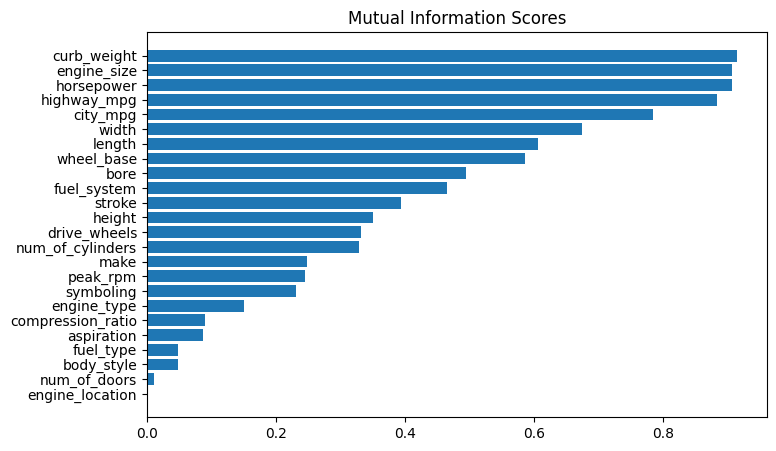

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

La variable `curb_weight` muestra una fuerte relación con el target `price`

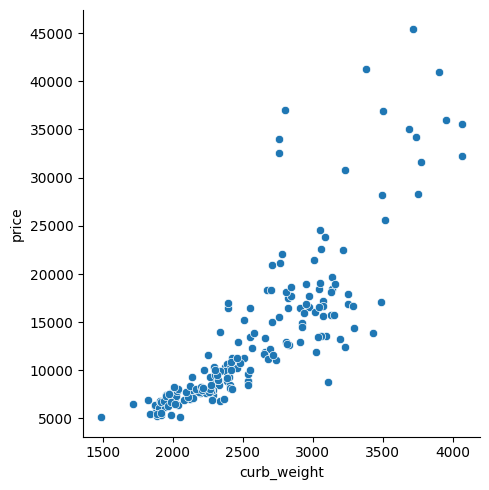

In [45]:
sns.relplot(x="curb_weight", y="price", data=df)

La variable `fuel_type` tiene una puntuación MI bastante baja, pero como podemos ver en la figura, separa claramente dos poblaciones de `price` con diferentes tendencias dentro de la variable de `horsepower`. Esto indica que `fuel_type` contribuye con un efecto de interacción y, después de todo, podría no carecer de importancia. Antes de decidir que una característica no es importante según su puntuación MI, es bueno investigar cualquier posible efecto de interacción: el conocimiento del dominio puede ofrecer mucha orientación aquí.

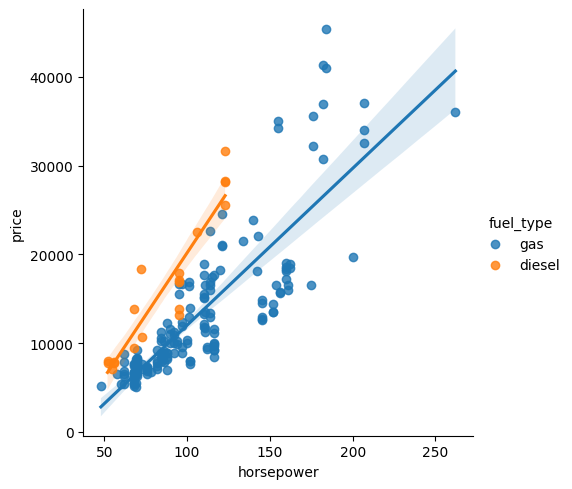

In [46]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)

### 4. Fisher score

Esta puntuación debe usarse para evaluar variables categóricas en una tarea de clasificación. Compara la distribución observada de las diferentes clases de objetivo Y entre las diferentes categorías de la característica, con la distribución esperada de las clases de objetivo, independientemente de las categorías de característica.

In [47]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [53]:
iris = load_iris()

# create features and target
X = iris.data
y = iris.target

# convert to categorical data by converting data to integers
X = X.astype(int)

In [54]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [55]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


### 5. ANOVA F-value

Si las variables son categóricas, calcularemos una estadística $\chi^{2}$ entre cada característica y el vector objetivo. Sin embargo, si las características son cuantitativas, calcularemos el valor F de ANOVA entre cada característica y el vector objetivo.

Las puntuaciones del valor F examinan si, cuando agrupamos la característica numérica por el vector objetivo, las medias para cada grupo son significativamente diferentes.

In [56]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [57]:
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [58]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [59]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2
